Dataset format for Faster-RCNN code : (fname_path, xmin, xmax, ymin, ymax,class_name)

In [ ]:
idx = 146

test_img = Image.open(os.path.join(dir_path,file_list[idx])).convert('RGB')

# Predicted values
test_img, test_boxes, test_labels = single_img_predict(test_img)

# Ground truth values
bbox, labels  = read_annot(file_list[idx], xml_path)

def get_difference(real_box, prediction_box):
  differences = []
  for coordinate in range(4):
    elementwise = abs(real_box[coordinate]-prediction_box[coordinate])
    differences.append(elementwise)
  return differences

def check_box(difference_list):
  for element in difference_list:
    if element>10:
      return False
  return True

def match_boxes(gt_boxes, gt_labels, pred_boxes, pred_labels):
  pairs = []
  num = len(gt_boxes)
  for y in range(num):
    for i in range(num):

      our_list = get_difference(gt_boxes[i], pred_boxes[y])
      print(our_list)
      result = check_box(our_list)
      if result == True:
          pair = [gt_boxes[i], gt_labels[i], pred_boxes[y], pred_labels[y]]
          pairs.append(pair)
  return pairs

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"edaayan","key":"d2c42e70e47c9a1e9d06037f91939195"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/face-mask-detection
!unzip \*.zip  && rm *.zip

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import urllib
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader, Dataset
import os 
from PIL import Image
import random
import xml.etree.ElementTree as ET
import time
import requests
from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [ ]:
# path of images directory
dir_path = 'images'

# path of xml files directory
xml_path = 'annotations'
xml_dir = 'annotations'

# List of Image file name 
file_list = os.listdir(dir_path)
xml_list = os.listdir(xml_dir)
# How many image files?
print('There are total {} images.'.format(len(file_list)))
print('There are total {} files.'.format(len(xml_list)))

annotation_path = xml_path
images_path = dir_path
annotations = sorted(os.listdir(annotation_path))
print(annotations)
images = sorted(os.listdir(images_path))
print(images)


There are total 853 images.
There are total 853 files.
['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss130.xml', 'maksssksksss131.xml', 'maksssksksss132.xml', 'maksssksksss133.xml', 'maksssksksss134.xml', 'maksssks

In [ ]:
X = images
y = annotations

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

print(X_train)
print(y_train)

['maksssksksss806.png', 'maksssksksss19.png', 'maksssksksss808.png', 'maksssksksss576.png', 'maksssksksss486.png', 'maksssksksss499.png', 'maksssksksss10.png', 'maksssksksss271.png', 'maksssksksss514.png', 'maksssksksss546.png', 'maksssksksss489.png', 'maksssksksss784.png', 'maksssksksss535.png', 'maksssksksss814.png', 'maksssksksss589.png', 'maksssksksss397.png', 'maksssksksss55.png', 'maksssksksss610.png', 'maksssksksss542.png', 'maksssksksss503.png', 'maksssksksss43.png', 'maksssksksss641.png', 'maksssksksss17.png', 'maksssksksss231.png', 'maksssksksss452.png', 'maksssksksss295.png', 'maksssksksss818.png', 'maksssksksss423.png', 'maksssksksss415.png', 'maksssksksss708.png', 'maksssksksss377.png', 'maksssksksss218.png', 'maksssksksss484.png', 'maksssksksss327.png', 'maksssksksss57.png', 'maksssksksss148.png', 'maksssksksss555.png', 'maksssksksss678.png', 'maksssksksss571.png', 'maksssksksss763.png', 'maksssksksss488.png', 'maksssksksss282.png', 'maksssksksss627.png', 'maksssksksss622

In [ ]:
def read_annot(file_name, xml_dir):
    """
    Function used to get the bounding boxes and labels from the xml file
    Input:
        file_name: image file name
        xml_dir: directory of xml file
    Return:
        bbox : list of bounding boxes
        labels: list of labels
    """
    bbox = []
    labels = []
    
    annot_path = os.path.join(xml_dir, file_name[:-3]+'xml')
    tree = ET.parse(annot_path)
    root = tree.getroot()
    for boxes in root.iter('object'):
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)
        label = boxes.find('name').text
        bbox.append([xmin,ymin,xmax,ymax])
        if label == 'with_mask':
            label_idx = 2
        elif label == 'without_mask':
            label_idx = 0
        else:
            label_idx = 1
        labels.append(label_idx)
        
    return bbox, labels

In [ ]:
# help function for drawing bounding boxes on image
def draw_boxes(img, boxes,labels, thickness=1):
    """
    Function to draw bounding boxes
    Input:
        img: array of img (h, w ,c)
        boxes: list of boxes (int)
        labels: list of labels (int)
    
    """
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for box,label in zip(boxes,labels):
        box = [int(x) for x in box]
        if label == 2:
            color = (0,225,0) # green
        elif label == 1:
            color = (0,0,225) # red
        else:
            color = (225,0,0)
        cv2.rectangle(img, (box[0],box[1]),(box[2],box[3]),color,thickness)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


[[22, 121, 77, 181], [231, 76, 290, 144], [335, 135, 395, 198], [78, 105, 111, 149]] [2, 2, 0, 0]


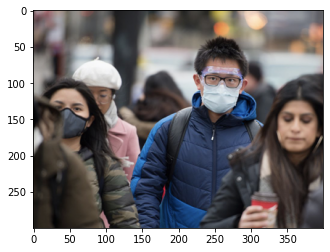

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


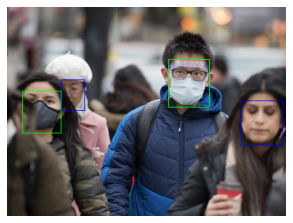

In [ ]:
file_list = os.listdir(dir_path)
bir_file = file_list[5]
xml_dir = 'annotations'
bbox, labels = read_annot(bir_file, xml_dir)
print(bbox, labels)
image_pathi = os.path.join(dir_path, bir_file)
img0 = cv2.imread(image_pathi)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB) 

plt.imshow(img0)
plt.show()

img = draw_boxes(plt.imread(image_pathi), bbox,labels)
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.axis('off')
ax.imshow(img)

In [ ]:
class image_dataset(Dataset):
    def __init__(self, image_list, image_dir, xml_dir):
        self.image_list = image_list
        self.image_dir = image_dir
        self.xml_dir = xml_dir
       
    def __getitem__(self, idx):
        """
        Load the image
        """
        img_name = self.image_list[idx]
        img_path = os.path.join(self.image_dir, img_name)
        img = Image.open(img_path).convert('RGB')
        img = transforms.ToTensor()(img)

        """
        build the target dict
        """
        bbox, labels = read_annot(img_name, self.xml_dir)
        boxes = torch.as_tensor(bbox, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        
        area = (boxes[:,2] - boxes[:,0]) * (boxes[:,3] - boxes[:,1])
        area = torch.as_tensor(area, dtype=torch.float32)
        iscrowd = torch.zeros((len(bbox),), dtype=torch.int64)
        
        target = {}
        
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([idx])
        target['area'] = area
        target['iscrowed'] = iscrowd
        return img , target
                    
    def __len__(self):
        return len(self.image_list)

In [ ]:
our_dataset = image_dataset(X_train, dir_path, xml_path)
len(our_dataset)


682

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

mask_loader = DataLoader(our_dataset,
                        batch_size=2,
                        shuffle=True,
                        num_workers=2,
                        collate_fn=collate_fn)

In [ ]:
num_classes = 4 # background, without_mask, with_mask, mask_weared_incorrect

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

model = model.to(device)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [ ]:
params = [p for p in model.parameters() if p.requires_grad]
#optimizer = torch.optim.Adam(params, lr=0.01)
optimizer = torch.optim.SGD(params, lr=0.01,momentum=0.9, weight_decay=0.0005)
#lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=3,gamma=0.1)
num_epochs=5


In [ ]:

# Main training function
loss_list = []
start_time = time.clock()
model.train()
model.cuda()
for epoch in range(num_epochs):
    print('Starting training....{}/{}'.format(epoch+1, num_epochs))
    loss_sub_list = []
    for images, targets in mask_loader:
        images = images.to(device) #list(image.to(device) for image in images)
        targets = targets.to(device) # [{k:v.to(device) for k,v in t.items()} for t in targets]
        
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        loss_sub_list.append(loss_value)
        
        # update optimizer and learning rate
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
    
    current_time = time.clock()
    total_time = current_time-start_time  
    #print the loss of epoch
    epoch_loss = np.mean(loss_sub_list)
    loss_list.append(epoch_loss)
    print('Epoch loss: {:.3f} , time used: ({:.1f}s)'.format(epoch_loss, total_time))

Starting training....1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Epoch loss: 0.346 , time used: (612.0s)
Starting training....2/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch loss: 0.246 , time used: (1226.0s)
Starting training....3/5
Epoch loss: 0.211 , time used: (1842.2s)
Starting training....4/5
Epoch loss: 0.181 , time used: (2448.9s)
Starting training....5/5
Epoch loss: 0.163 , time used: (3052.0s)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[22, 121, 77, 181], [231, 76, 290, 144], [335, 135, 395, 198], [78, 105, 111, 149]] [2, 2, 0, 0]
(300, 400, 3)


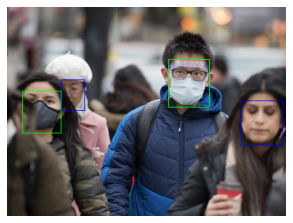

In [ ]:
img_name = file_list[5]
img_path = os.path.join(dir_path, img_name)
img = Image.open(img_path).convert('RGB')
img = transforms.ToTensor()(img)

xml_dir = 'annotations'
bbox, labels = read_annot(img_name, xml_dir)
print(bbox, labels)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
print(img.shape)
#plt.imshow(img)
#plt.show()

img = draw_boxes(plt.imread(img_path), bbox,labels)
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.axis('off')
ax.imshow(img)

In [ ]:
img_name = file_list[5]
img_path = os.path.join(dir_path, img_name)
img = Image.open(img_path).convert('RGB')
img = transforms.ToTensor()(img)
model.eval()
    
with torch.no_grad():
    predictions = model(img.unsqueeze(0).to(device))
predictions

[{'boxes': tensor([[ 26.8289, 122.7260,  78.5413, 175.6679],
          [234.3438,  82.5647, 287.4571, 142.2402],
          [337.6923, 133.6558, 394.6530, 198.7452],
          [317.3394, 299.9279, 322.3989, 299.9995],
          [338.0872, 133.6152, 395.0026, 196.7070],
          [317.3407, 299.9271, 322.3865, 299.9979],
          [315.9528, 299.8089, 321.1350, 299.9937]], device='cuda:0'),
  'labels': tensor([2, 2, 1, 2, 2, 1, 2], device='cuda:0'),
  'scores': tensor([0.9958, 0.9915, 0.1563, 0.1464, 0.1040, 0.0757, 0.0726],
         device='cuda:0')}]

In [ ]:
# helper function for single image prediction
def single_img_predict(img, nm_thrs = 0.3, score_thrs=0.8):
    test_img = transforms.ToTensor()(img)
    model.eval()
    
    with torch.no_grad():
        predictions = model(test_img.unsqueeze(0).to(device))
        
    test_img = test_img.permute(1,2,0).numpy()
    
    # non-max supression
    keep_boxes = torchvision.ops.nms(predictions[0]['boxes'].cpu(),predictions[0]['scores'].cpu(),nm_thrs)
    
    # Only display the bounding boxes which higher than the threshold
    score_filter = predictions[0]['scores'].cpu().numpy()[keep_boxes] > score_thrs
    
    # get the filtered result
    test_boxes = predictions[0]['boxes'].cpu().numpy()[keep_boxes][score_filter]
    test_labels = predictions[0]['labels'].cpu().numpy()[keep_boxes][score_filter]
    
    return test_img, test_boxes, test_labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


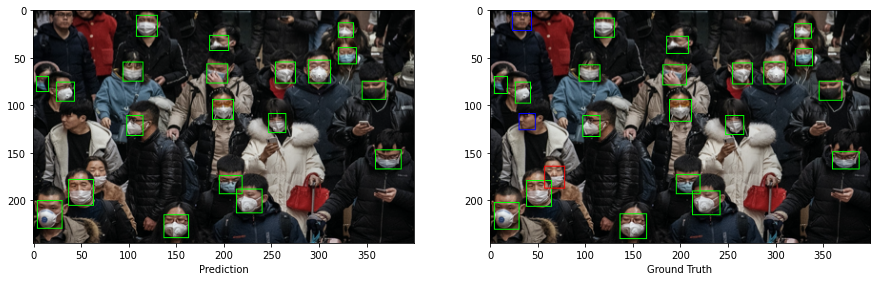

In [ ]:
#idx = random.randint(1,len(file_list))
idx = 19
test_img = Image.open(os.path.join(dir_path,file_list[idx])).convert('RGB')

# Prediction
test_img, test_boxes, test_labels = single_img_predict(test_img)
test_output = draw_boxes(test_img, test_boxes,test_labels)

# Draw the bounding box of ground truth
bbox, labels  = read_annot(file_list[idx], xml_path)
#draw bounding boxes on the image
gt_output = draw_boxes(test_img, bbox,labels)

# Display the result
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.imshow(test_output)
ax1.set_xlabel('Prediction')
ax2.imshow(gt_output)
ax2.set_xlabel('Ground Truth')
plt.show()